In [1]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [15]:
import sys
sys.path.insert(0, '/home/563/esh563/TINT')

In [2]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import classification as cl
import caine_func as caf
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport classification
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to us

Automatic pdb calling has been turned ON


In [79]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [16]:
base_dir = '/g/data/hj10/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/'
save_dir = '/home/563/esh563/TINT_tracks/'
fig_dir = '/home/563/esh563/TINT_figures/'
ERA5_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/'

In [4]:
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Liberation Serif'})
rcParams.update({'mathtext.fontset': 'dejavuserif'})
rcParams.update({'font.size': 12})

# Load Tracks

In [306]:
class_df = cl.get_counts(base_dir='/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/')

Processing year 1998
Adding Pope monsoon regime.
Processing year 1999
Adding Pope monsoon regime.
Processing year 2001
Adding Pope monsoon regime.
Processing year 2002
Adding Pope monsoon regime.
Processing year 2003
Adding Pope monsoon regime.
Processing year 2004
Adding Pope monsoon regime.
Processing year 2005
Adding Pope monsoon regime.
Processing year 2006
Adding Pope monsoon regime.
Processing year 2009
Adding Pope monsoon regime.
Processing year 2010
Adding Pope monsoon regime.
Processing year 2011
Adding Pope monsoon regime.
Processing year 2012
Adding Pope monsoon regime.
Processing year 2013
Adding Pope monsoon regime.
Processing year 2014
Adding Pope monsoon regime.
Processing year 2015
Adding Pope monsoon regime.


In [307]:
out_file_name = save_dir + 'lower_conv_level_classes.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump(class_df, f)

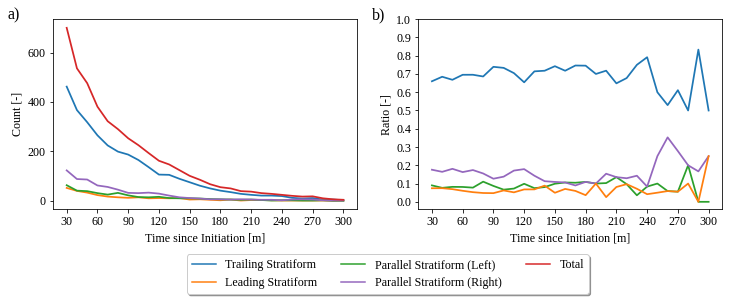

In [308]:
[test, TS, LS, LeS, RiS, total] = [[] for i in range(6)]

totals = cl.plot_offsets(class_df)
# test.append('Base')
# TS.append(totals[0].values[0])
# LS.append(totals[1].values[0])
# LeS.append(totals[2].values[0])
# RiS.append(totals[3].values[0])
# total.append(totals[4].values[0])

# offset_sensitivity_df = pd.DataFrame({
#     'Test': test, 'Trailing Stratiform': TS, 
#     'Leading Stratiform': LS, 'Parallel Stratiform (Left)': LeS,
#     'Parallel Stratiform (Right)': RiS, 'Total': total})

# offset_sensitivity_df = offset_sensitivity_df.set_index('Test')
# offset_sensitivity_df

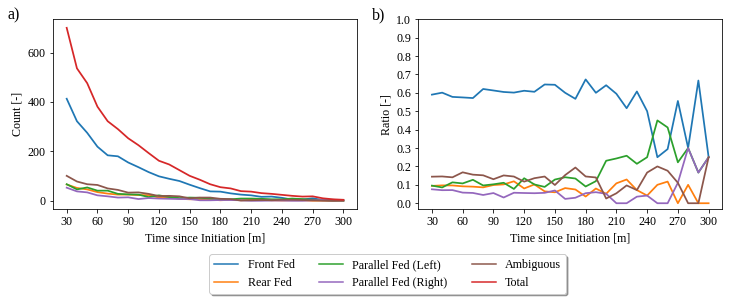

In [309]:
[FF, RF, LeF, RiF, A, total] = [[] for i in range(6)]

totals = cl.plot_inflows(class_df)
# FF.append(totals[0].values[0])
# RF.append(totals[1].values[0])
# LeF.append(totals[2].values[0])
# RiF.append(totals[3].values[0])
# A.append(totals[4].values[0])
# total.append(totals[5].values[0])

# inflow_sensitivity_df = pd.DataFrame({
#     'Test': test, 'Front Fed': FF, 
#     'Rear Fed': RF, 'Parallel Fed (Left)': LeF,
#     'Parallel Fed (Right)': RiF, 'Ambiguous': A, 'Total': total})

# inflow_sensitivity_df = inflow_sensitivity_df.set_index('Test')
# inflow_sensitivity_df

In [301]:
inflow_sensitivity_df

,Test,Front Fed,Rear Fed,Parallel Fed (Left),Parallel Fed (Right),Ambiguous,Total
0,Base,2661,350,536,235,790,4572


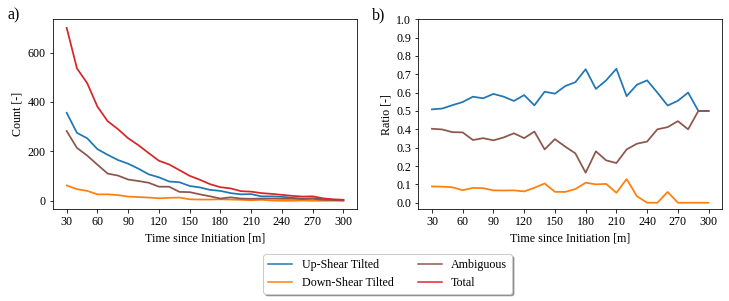

In [310]:
[UST, DST, A, total] = [[] for i in range(4)]

totals = cl.plot_tilts(class_df)
# UST.append(totals[0].values[0])
# DST.append(totals[1].values[0])
# A.append(totals[2].values[0])
# total.append(totals[3].values[0])

# tilt_sensitivity_df = pd.DataFrame({
#     'Test': test, 'Up-Shear Tilted': UST, 
#     'Down-Shear Tilted': DST, 'Ambiguous': A, 'Total': total})

# tilt_sensitivity_df = tilt_sensitivity_df.set_index('Test')
# tilt_sensitivity_df

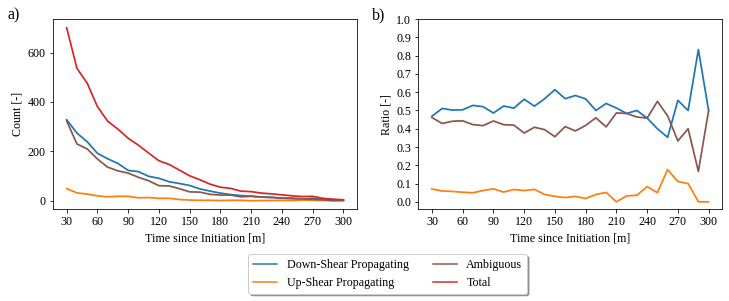

In [312]:
[USP, DSP, A, total] = [[] for i in range(4)]
totals = cl.plot_propagations(class_df)
# USP.append(totals[0].values[0])
# DSP.append(totals[1].values[0])
# A.append(totals[2].values[0])
# total.append(totals[3].values[0])

# prop_sensitivity_df = pd.DataFrame({
#     'Test': test, 'Up-Shear Propagating': UST, 
#     'Down-Shear Propagating': DST, 'Ambiguous': A, 'Total': total})

# prop_sensitivity_df = prop_sensitivity_df.set_index('Test')
# prop_sensitivity_df

In [231]:
counts_df = pd.DataFrame({'counts': class_df.value_counts()})
counts_df = counts_df.xs(2, level='pope_regime')
ratios = counts_df['counts']/counts_df['counts'].sum()
counts_df['percent'] = ratios * 100
counts_df = counts_df.drop('Ambiguous', level='inflow_type')

q_str = "(offset_type == 'Trailing Stratiform'"
q_str += "and inflow_type == 'Front Fed')"
q_str += "or (offset_type == 'Leading Stratiform'"
q_str += "and inflow_type == 'Rear Fed')"
q_str += "or (offset_type == 'Parallel Stratiform (Left)'"
q_str += "and inflow_type == 'Parallel Fed (Right)')"
q_str += "or (offset_type == 'Parallel Stratiform (Right)'"
q_str += "and inflow_type == 'Parallel Fed (Left)')"
TS = counts_df.query(q_str)

q_str = "(offset_type == 'Leading Stratiform'"
q_str += "and inflow_type == 'Front Fed')"
q_str += "or (offset_type == 'Trailing Stratiform'"
q_str += "and inflow_type == 'Rear Fed')"
q_str += "or (offset_type == 'Parallel Stratiform (Left)'"
q_str += "and inflow_type == 'Parallel Fed (Left)')"
q_str += "or (offset_type == 'Parallel Stratiform (Right)'"
q_str += "and inflow_type == 'Parallel Fed (Right)')"
LS = counts_df.query(q_str)

q_str = "(offset_type == 'Leading Stratiform'"
q_str += "and inflow_type == 'Parallel Fed (Right)')"
q_str += "or (offset_type == 'Trailing Stratiform'"
q_str += "and inflow_type == 'Parallel Fed (Left)')"
q_str += "or (offset_type == 'Parallel Stratiform (Left)'"
q_str += "and inflow_type == 'Front Fed')"
q_str += "or (offset_type == 'Parallel Stratiform (Right)'"
q_str += "and inflow_type == 'Rear Fed (Right)')"
LeS = counts_df.query(q_str)

q_str = "(offset_type == 'Leading Stratiform'"
q_str += "and inflow_type == 'Parallel Fed (Left)')"
q_str += "or (offset_type == 'Trailing Stratiform'"
q_str += "and inflow_type == 'Parallel Fed (Right)')"
q_str += "or (offset_type == 'Parallel Stratiform (Right)'"
q_str += "and inflow_type == 'Front Fed')"
q_str += "or (offset_type == 'Parallel Stratiform (Left)'"
q_str += "and inflow_type == 'Rear Fed')"
RiS = counts_df.query(q_str)

In [238]:
LS.sum()

counts     331.000000
percent     21.437824
dtype: float64

In [164]:
[print(x.sum()) for x in [LS, TS, LeS, RiS]]

counts     742.000000
percent     10.080152
dtype: float64
counts     3270.000000
percent      44.423312
dtype: float64
counts     864.000000
percent     11.737536
dtype: float64
counts     898.000000
percent     12.199429
dtype: float64


[None, None, None, None]

In [240]:
counts_df = pd.DataFrame({'count': class_df.value_counts()})
counts_df = counts_df.xs(2, level='pope_regime')
ratios = counts_df['count']/counts_df['counts'].sum()
counts_df['percent'] = ratios * 100
counts_df = counts_df.drop('Ambiguous', level='inflow_type')

counts_df = counts_df.drop('Ambiguous', level='inflow_type')
# counts_df = counts_df.drop('Ambiguous', level='tilt_dir')
# counts_df = counts_df.drop('Ambiguous', level='prop_dir')
# counts_df
grouped_counts = counts_df.groupby(['offset_type', 'inflow_type']).sum()
grouped_counts = grouped_counts.sort_values('count', axis=0, ascending=False)
grouped_counts

counts    percent
offset_type                 inflow_type                            
Trailing Stratiform         Rear Fed                 238  15.414508
                            Parallel Fed (Left)      230  14.896373
                            Front Fed                154   9.974093
Parallel Stratiform (Right) Parallel Fed (Left)      121   7.836788
                            Rear Fed                  95   6.152850
Leading Stratiform          Rear Fed                  53   3.432642
Trailing Stratiform         Parallel Fed (Right)      47   3.044041
Parallel Stratiform (Left)  Parallel Fed (Left)       43   2.784974
Parallel Stratiform (Right) Parallel Fed (Right)      42   2.720207
                            Front Fed                 29   1.878238
Leading Stratiform          Parallel Fed (Left)       24   1.554404
Parallel Stratiform (Left)  Rear Fed                  11   0.712435
                            Front Fed                  9   0.582902
Leading Stratiform          Front Fed                  8   0.518135
                            Parallel Fed (Right)       7   0.453368
Parallel Stratiform (Left)  Parallel Fed (Right)       7   0.453368

In [252]:
counts_df = pd.DataFrame({'count': class_df.value_counts()})
counts_df = counts_df.groupby(
    ['offset_type', 'inflow_type', 'tilt_dir', 'prop_dir']).sum()
percent = (counts_df['count']/counts_df['count'].sum()) * 100
counts_df['total_percent'] = percent

counts_df = counts_df.drop('Ambiguous', level='inflow_type')
counts_df = counts_df.drop('Ambiguous', level='tilt_dir')
counts_df = counts_df.drop('Ambiguous', level='prop_dir')
percent = (counts_df['count']/counts_df['count'].sum()) * 100
counts_df['percent'] = percent
counts_df.sort_values('percent', axis=0, ascending=False)

count  \
offset_type                 inflow_type          tilt_dir          prop_dir                        
Trailing Stratiform         Front Fed            Up-Shear Tilted   Down-Shear Propagating   1778   
Leading Stratiform          Front Fed            Down-Shear Tilted Down-Shear Propagating    103   
Trailing Stratiform         Front Fed            Down-Shear Tilted Up-Shear Propagating       92   
                            Rear Fed             Up-Shear Tilted   Up-Shear Propagating       61   
                            Parallel Fed (Left)  Up-Shear Tilted   Down-Shear Propagating     45   
Parallel Stratiform (Left)  Parallel Fed (Left)  Down-Shear Tilted Down-Shear Propagating     36   
Parallel Stratiform (Right) Front Fed            Up-Shear Tilted   Down-Shear Propagating     31   
                            Parallel Fed (Left)  Up-Shear Tilted   Down-Shear Propagating     27   
                            Front Fed            Down-Shear Tilted Down-Shear Propagating     27   
Trailing Stratiform         Rear Fed             Down-Shear Tilted Down-Shear Propagating     24   
Leading Stratiform          Rear Fed             Down-Shear Tilted Up-Shear Propagating       20   
Parallel Stratiform (Left)  Front Fed            Down-Shear Tilted Down-Shear Propagating     19   
                                                 Up-Shear Tilted   Down-Shear Propagating     19   
Trailing Stratiform         Parallel Fed (Right) Up-Shear Tilted   Down-Shear Propagating     15   
Parallel Stratiform (Right) Parallel Fed (Left)  Down-Shear Tilted Up-Shear Propagating       13   
                            Rear Fed             Up-Shear Tilted   Up-Shear Propagating       10   
Leading Stratiform          Parallel Fed (Left)  Down-Shear Tilted Up-Shear Propagating       10   
                            Front Fed            Up-Shear Tilted   Up-Shear Propagating       10   
Parallel Stratiform (Right) Parallel Fed (Right) Down-Shear Tilted Down-Shear Propagating     10   
Leading Stratiform          Parallel Fed (Left)  Down-Shear Tilted Down-Shear Propagating      9   
Trailing Stratiform         Parallel Fed (Right) Up-Shear Tilted   Up-Shear Propagating        9   
Parallel Stratiform (Right) Rear Fed             Down-Shear Tilted Up-Shear Propagating        9   
Trailing Stratiform         Parallel Fed (Left)  Down-Shear Tilted Down-Shear Propagating      8   
Leading Stratiform          Rear Fed             Up-Shear Tilted   Down-Shear Propagating      8   
Trailing Stratiform         Parallel Fed (Left)  Up-Shear Tilted   Up-Shear Propagating        8   
Parallel Stratiform (Right) Parallel Fed (Right) Up-Shear Tilted   Up-Shear Propagating        8   
Trailing Stratiform         Parallel Fed (Left)  Down-Shear Tilted Up-Shear Propagating        6   
Parallel Stratiform (Right) Rear Fed             Up-Shear Tilted   Down-Shear Propagating      5   
Parallel Stratiform (Left)  Parallel Fed (Left)  Up-Shear Tilted   Up-Shear Propagating        4   
Parallel Stratiform (Right) Front Fed            Down-Shear Tilted Up-Shear Propagating        4   
Trailing Stratiform         Parallel Fed (Right) Down-Shear Tilted Up-Shear Propagating        3   
Parallel Stratiform (Left)  Front Fed            Up-Shear Tilted   Up-Shear Propagating        3   
Leading Stratiform          Parallel Fed (Left)  Up-Shear Tilted   Down-Shear Propagating      2   
                            Parallel Fed (Right) Down-Shear Tilted Up-Shear Propagating        2   
                                                 Up-Shear Tilted   Down-Shear Propagating      2   
Parallel Stratiform (Right) Front Fed            Up-Shear Tilted   Up-Shear Propagating        2   
Trailing Stratiform         Parallel Fed (Right) Down-Shear Tilted Down-Shear Propagating      1   
Parallel Stratiform (Left)  Parallel Fed (Right) Up-Shear Tilted   Down-Shear Propagating      1   
                                                 Down-Shear Tilted Up-Shear Propagating    

In [114]:
LS = test4.loc[[
    ('Leading Stratiform', 'Front Fed'), 
    ('Trailing Stratiform', 'Rear Fed'), 
    ('Parallel Stratiform (Left)', 'Parallel Fed (Left)'),
    ('Parallel Stratiform (Right)', 'Parallel Fed (Right)')]].sum()
TS = test4.loc[[
    ('Leading Stratiform', 'Rear Fed'), 
    ('Trailing Stratiform', 'Front Fed'), 
    ('Parallel Stratiform (Left)', 'Parallel Fed (Right)'),
    ('Parallel Stratiform (Right)', 'Parallel Fed (Left)')]].sum()
LeS = test4.loc[[
    ('Leading Stratiform', 'Parallel Fed (Right)'), 
    ('Trailing Stratiform', 'Parallel Fed (Left)'), 
    ('Parallel Stratiform (Left)', 'Front Fed'),
    ('Parallel Stratiform (Right)', 'Rear Fed')]].sum()
RiS = test4.loc[[
    ('Leading Stratiform', 'Parallel Fed (Left)'),
    ('Trailing Stratiform', 'Parallel Fed (Right)'), 
    ('Parallel Stratiform (Right)', 'Front Fed'),
    ('Parallel Stratiform (Left)', 'Rear Fed')]].sum()

# test4.loc[[('Leading Stratiform', 'Front Fed'), ('Trailing Stratiform', 'Rear Fed')]].sum()

# test3 = test3.drop(['Ambiguous (Shear Parallel to Stratiform Offset)', level=''])
# test3.xs('Parallel Stratiform (Right)')
# test2/test2.sum()
# test.groupby(['offset_type']).sum().drop('Ambiguous (On Quadrant Boundary)', level='offset_type')/test.sum()

In [115]:
print([LS, TS, LeS, RiS])

[counts    10.080152
dtype: float64, counts    44.423312
dtype: float64, counts    14.047004
dtype: float64, counts    12.199429
dtype: float64]


# Calculate Some Statistics

## System Size

In [7]:
# subset_logic = ~small_area
# sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_tracks = tracks_obj.system_tracks

sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2]) for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

# MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]
# max_MCS = max(MCS_lengths)

In [14]:
# Create 3 lists with lengths the lifetime of longest object.
[large, small, medium, nb, totals] = [np.zeros(100) for i in range(5)]

from tqdm import tqdm

for i in tqdm(sub_uids, file=sys.stdout, position=0, leave=True):
    
#     import pdb
#     pdb.set_trace()
    
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    cat = categories.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    
    # Define classifications
    large_area = cat['large_area'].values
    small_area = cat['small_area'].values
    medium_area = ~large_area & ~small_area
    not_border = cat['not_border'].values | cat['not_border_0'].values
    
    large_inds = scan_label[large_area]
    medium_inds = scan_label[medium_area]
    small_inds = scan_label[small_area]
    not_border_inds = scan_label[not_border]
    totals_inds = scan_label.tolist()
    
    # Break down sig_tilt categories
#     forward_tilt = ((-45 <= tilts) & (tilts <= 45)) 
#     backward_tilt = ((-135 >= tilts) | (tilts >= 135)) 

#     fwd_inds = scan_label[np.argwhere(forward_tilt).flatten().tolist()].tolist()
#     bwd_inds = scan_label[np.argwhere(backward_tilt).flatten().tolist()].tolist()
#     pll_inds = scan_label[np.argwhere(~backward_tilt & ~forward_tilt).flatten().tolist()].tolist()

    # Found error with large com dataset - object 14060 jumps across seasons
    try:
        large[large_inds] += 1
        small[small_inds] += 1
        medium[medium_inds] += 1
        nb[not_border_inds] += 1
        totals[totals_inds] += 1
    except:
        print('Error with system {}.'.format(i))

100%|██████████| 25948/25948 [02:18<00:00, 186.83it/s]


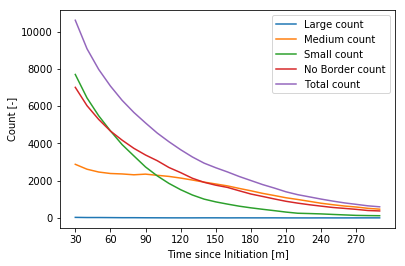

In [17]:
plt.plot(np.arange(30,300,10), large[3:30], label='Large count')
plt.plot(np.arange(30,300,10), medium[3:30], label='Medium count')
plt.plot(np.arange(30,300,10), small[3:30], label='Small count')
plt.plot(np.arange(30,300,10), nb[3:30], label='No Border count')
plt.plot(np.arange(30,300,10), totals[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

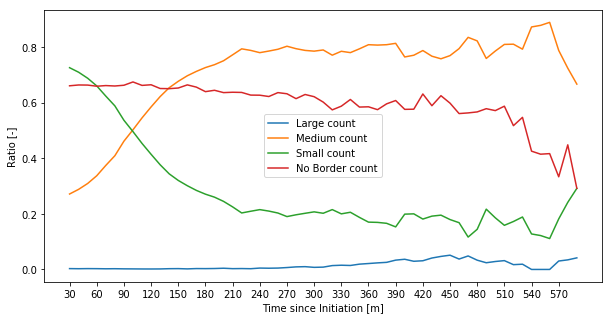

In [22]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(30,600,10), (large/totals)[3:60], label='Large count')
plt.plot(np.arange(30,600,10), (medium/totals)[3:60], label='Medium count')
plt.plot(np.arange(30,600,10), (small/totals)[3:60], label='Small count')
plt.plot(np.arange(30,600,10), (nb/totals)[3:60], label='No Border count')
plt.xticks(np.arange(30,600,30))
plt.ylabel('Ratio [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
# Note that we don't really know the start times of the systems!
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_ratios.png')

## Training Lines

In [12]:
subset_logic = (categories['not_border'] & categories['not_border_0']
                & ~categories['large_area'] & ~categories['small_area'] 
                & categories['linear'] & ~categories['stationary']
                & categories['sig_vel_mag'])
sub_tracks = tracks_obj.system_tracks[subset_logic]
sub_cat = categories[subset_logic]
# sub_tracks = tracks_obj.system_tracks
# sub_cat = categories

sub_uids = list(sorted(set([int(sub_tracks.index.values[i][2])
                            for i in range(len(sub_tracks))])))
sub_uids = [str(i) for i in sub_uids]

# MCS_lengths = [len(sub_tracks.xs(i, level='uid').reset_index(level='time').index.values) for i in sub_uids]
# max_MCS = max(MCS_lengths)

In [13]:
# Create 3 lists with lengths the lifetime of longest object.
[par, perp, totals] = [np.zeros(100) for i in range(3)]

from tqdm import tqdm

for i in tqdm(sub_uids, file=sys.stdout, position=0, leave=True):
       
    obj = sub_tracks.xs(i, level='uid').reset_index(level='time')
    cat = sub_cat.xs(i, level='uid').reset_index(level='time')
    scans = obj.index.values
    scan_label = scans - min(scans)
    
    # Define classifications
    perp_align = cat['perp_align'].values
    par_align = cat['par_align'].values
        
    par_inds = scan_label[par_align]
    perp_inds = scan_label[perp_align]
    totals_inds = scan_label.tolist()

    # Found error with large com dataset - object 14060 jumps across seasons
    try:
        par[par_inds] += 1
        perp[perp_inds] += 1
        totals[totals_inds] += 1
    except:
        print('Error with system {}.'.format(i))

100%|██████████| 91/91 [00:00<00:00, 170.20it/s]


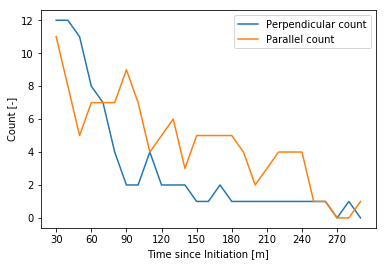

In [14]:
plt.plot(np.arange(30,300,10), perp[3:30], label='Perpendicular count')
plt.plot(np.arange(30,300,10), par[3:30], label='Parallel count')
# plt.plot(np.arange(30,300,10), totals[3:30], label='Total count')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

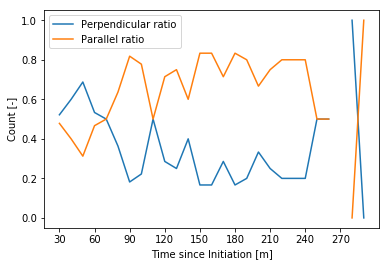

In [15]:
plt.plot(np.arange(30,300,10), (perp/totals)[3:30], label='Perpendicular ratio')
plt.plot(np.arange(30,300,10), (par/totals)[3:30], label='Parallel ratio')
plt.xticks(np.arange(30,300,30))
plt.ylabel('Count [-]')
plt.xlabel('Time since Initiation [m]')
plt.legend()
plt.savefig('/g/data/w40/esh563/CPOL_analysis/figures/TINT/size_counts.png')

## Updraft Tilt versus Stratiform Tilt

In [29]:
def calc_mean_max_updrafts(system_tracks, min_height_ind = 20):
    ud = system_tracks['updrafts']
    ud_tilt = []
    tallest_ud = []
    mean_ud = []
    no_tilt=0
    for i in range(len(ud)):
        ud_i = ud.iloc[i]
        ud_tilt_i = []
        for j in range(len(ud_i)):
            if ud_i[j][-1][0] >= min_height_ind:
                ud_tilt_i_j = (ud_i[j][-1]-ud_i[j][0])*(.5, 2.5, 2.5)
                if np.all(ud_tilt_i_j[1:3] == [0,0]):
                    # Count updrafts with no tilt seperately
                    no_tilt+=1
                else:
                    ud_tilt_i.append(ud_tilt_i_j)
       
        if ud_tilt_i != []:
            ud_tilt.append(ud_tilt_i)
            mean_ud.append(np.nanmean(np.array(ud_tilt_i), axis=0))
        else:
            ud_tilt.append(np.ones(3)*np.nan)
            mean_ud.append(np.ones(3)*np.nan)
        try:
            tallest_ind = np.argmax(np.array(ud_tilt_i)[:,0])
            tallest_ud.append(np.array(ud_tilt_i)[tallest_ind,:])
        except:
            tallest_ud.append(np.ones(3)*np.nan)
        
    return ud_tilt, mean_ud, tallest_ud

### Tallest Updraft

In [33]:
subset_logic = sig_area & not_border & sig_tilt_mag & not_border_0 & sig_vel_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
ud_tilt, mean_ud, tallest_ud = calc_mean_max_updrafts(sub_tracks)

num = np.array(tallest_ud)
den = np.tile(np.array(tallest_ud)[:,0], (3,1)).transpose()
ud_norm = (num/den)[:,1:]
ud_mag = np.sqrt(ud_norm[:,0] ** 2 + ud_norm[:,1] ** 2)
ud_dir = np.arctan2(ud_norm[:,0], ud_norm[:,1])
ud_dir = np.rad2deg(ud_dir)

vel_dir = sub_tracks['vel_dir'].values
tilt_dir = sub_tracks['tilt_dir'].values

sys_rel_tilt_dir = np.mod(tilt_dir - vel_dir, 360)
sys_rel_tilt_dir = np.round(sys_rel_tilt_dir, 3)

sys_rel_ud_tilt_dir = np.mod(ud_dir - vel_dir, 360)
sys_rel_ud_tilt_dir = np.round(sys_rel_ud_tilt_dir, 3)

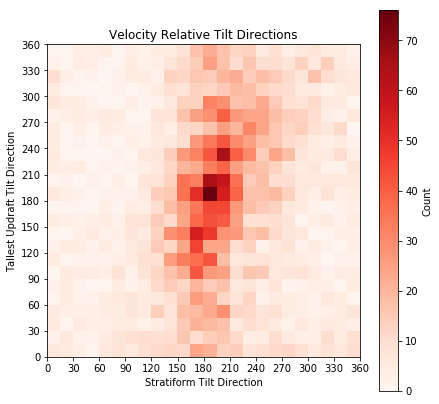

In [35]:
vel_dir = sub_tracks['vel_dir'].values
vel_mag = np.sqrt(sub_tracks['u_shift']**2 + sub_tracks['v_shift']**2).values
tilt_dir = sub_tracks['tilt_dir'].values
bins = np.arange(0,360+15,15)
ticks = np.arange(0,360+30,30)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111)
h = ax.hist2d(sys_rel_tilt_dir, sys_rel_ud_tilt_dir, bins=bins, range=[[0, 360], [0, 360]], cmap='Reds')
# ax.scatter(tilt_dir, ud_dir, s=0.75)
plt.xlabel('Stratiform Tilt Direction')
plt.ylabel('Tallest Updraft Tilt Direction')
plt.title('Velocity Relative Tilt Directions')
plt.xlim([0, 360])
plt.ylim([0, 360])
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_aspect('equal')
cb = plt.colorbar(h[3], ax=ax)
cb.set_label('Count')

### Mean Updraft

In [36]:
subset_logic = sig_area & not_border & sig_tilt_mag & not_border_0 & sig_vel_mag
sub_tracks = tracks_obj.system_tracks[subset_logic]
ud_tilt, mean_ud, tallest_ud = calc_mean_max_updrafts(sub_tracks)

num = np.array(mean_ud)
den = np.tile(np.array(mean_ud)[:,0], (3,1)).transpose()
ud_norm = (num/den)[:,1:]
ud_mag = np.sqrt(ud_norm[:,0] ** 2 + ud_norm[:,1] ** 2)
ud_dir = np.arctan2(ud_norm[:,0], ud_norm[:,1])
ud_dir = np.rad2deg(ud_dir)

vel_dir = sub_tracks['vel_dir'].values
tilt_dir = sub_tracks['tilt_dir'].values

sys_rel_tilt_dir = np.mod(tilt_dir - vel_dir, 360)
sys_rel_tilt_dir = np.round(sys_rel_tilt_dir, 3)

sys_rel_ud_tilt_dir = np.mod(ud_dir - vel_dir, 360)
sys_rel_ud_tilt_dir = np.round(sys_rel_ud_tilt_dir, 3)

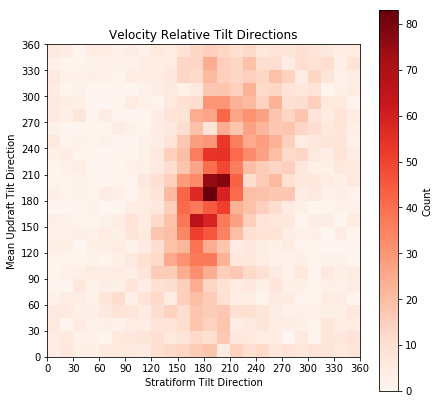

In [38]:
vel_dir = sub_tracks['vel_dir'].values
vel_mag = np.sqrt(sub_tracks['u_shift']**2 + sub_tracks['v_shift']**2).values
tilt_dir = sub_tracks['tilt_dir'].values
bins = np.arange(0,360+15,15)
ticks = np.arange(0,360+30,30)

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(111)
h = ax.hist2d(sys_rel_tilt_dir, sys_rel_ud_tilt_dir, bins=bins, range=[[0, 360], [0, 360]], cmap='Reds')
# ax.scatter(tilt_dir, ud_dir, s=0.75)
plt.xlabel('Stratiform Tilt Direction')
plt.ylabel('Mean Updraft Tilt Direction')
plt.title('Velocity Relative Tilt Directions')
plt.xlim([0, 360])
plt.ylim([0, 360])
plt.xticks(ticks)
plt.yticks(ticks)
ax.set_aspect('equal')
cb = plt.colorbar(h[3], ax=ax)
cb.set_label('Count')

In [11]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

## Rain

In [9]:
uids = list(set([tracks_obj.system_tracks.index[i][2] for i in range(len(tracks_obj.system_tracks))]))

ratio = []
tot_rain = []

for u in uids:
    hours = len(tracks_obj.system_tracks.xs(u, level='uid'))*1/6
    r = categories.xs(u, level='uid')['par_align'].sum()/len(tracks_obj.system_tracks.xs(u, level='uid'))
    ratio.append(r)
    tot_rain.append(tracks_obj.system_tracks.xs(u, level='uid')['tot_rain'][-1])
# tracks_obj.system_tracks.xs('0', level='uid')['vel_dir']

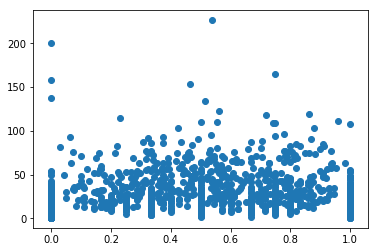

In [10]:
tot_rain = np.array(tot_rain)
tot_rain[tot_rain>500]=np.nan
plt.scatter(ratio, tot_rain)

In [73]:
sub_cat['par_align'].groupby(level='uid').sum().sort_values(ascending=False)[:20]

Series([], Name: par_align, dtype: bool)

In [ ]:
## Rain

uids = list(set([tracks_obj.system_tracks.index[i][2] for i in range(len(tracks_obj.system_tracks))]))

ratio = []
tot_rain = []

for u in uids:
    hours = len(tracks_obj.system_tracks.xs(u, level='uid'))*1/6
    r = categories.xs(u, level='uid')['par_align'].sum()/len(tracks_obj.system_tracks.xs(u, level='uid'))
    ratio.append(r)
    tot_rain.append(tracks_obj.system_tracks.xs(u, level='uid')['tot_rain'][-1])
# tracks_obj.system_tracks.xs('0', level='uid')['vel_dir']

tot_rain = np.array(tot_rain)
tot_rain[tot_rain>500]=np.nan
plt.scatter(ratio, tot_rain)

sub_cat['par_align'].groupby(level='uid').sum().sort_values(ascending=False)[:20]